In [165]:
import numpy as np
import pandas as pd
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Pandas II

#### 1.1 Recap: creating Series and DataFrames

In [8]:
# a Series is a Pandas object containing a single array of data.
mySeries = pd.Series([10, 20, 30, 40])
mySeries

0    10
1    20
2    30
3    40
dtype: int64

In [12]:
# in more detail, a Series contains an array of values, plus an associated array of
# data labels, called its index

mySeries.values

array([10, 20, 30, 40])

In [14]:
# you can pass both the values and the index to the Series constructor

mySeries = pd.Series(data = [10,20,30,40], index = ['a','b','c','d'])
mySeries

a    10
b    20
c    30
d    40
dtype: int64

#### 2. Unemployment data
*Objectives: Merge datasets, fill missing data through interpolation, use time series*

Credit: This section draws on an exercise developed by Geoff Boeing for his urban data science class

In [75]:
# Load a dataset of Eurostat unemployment data

unemployment = pd.read_csv('data/country_total.csv')

In [76]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


To check the dimensions of our dataset, we could use the len() function, or list the number of rows and columns through the shape attribute.

In [77]:
unemployment.shape

(20796, 5)

You may notice that the month column actually shows the year and month. Let's rename it.

In [78]:
unemployment.rename(columns = {'month': 'year_month'}, inplace = True)

We passed a dictionary to the .rename() method, specifying the column to rename (the dictionary key) and the new name to use (the dictionary value).

In [61]:
unemployment['year_month'].head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

**ATTENTION:** This column is kind of a mess!
    
What datatype is it, and why? How can you make this data easier to work with?

First we need to select just the column we're interested to. You can select columns using either square bracket notation (used above) or dot notation (below). In general, square bracket notation is preferable, as a column might inadvertently have the same name as a DataFrame method. Also when creating new columns, you always use square bracket notation.

In [62]:
unemployment.year_month.head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

**Challenge: let's separate year and month into their own columns.**

You could do this several ways. Remember that:
* Each column (ie. Series) has its own data type (a Numpy dtype).
* You can cast a column into a new dtype through the astype() method.

__Approach 1:__ Convert it to a string, then use string manipulation

In [94]:
unemployment.year_month = unemployment.year_month.astype(str)

In [91]:
# Let's break this down

example_cell = unemployment.year_month[0]

In [96]:
example_cell

'1993.01'

In [92]:
example_cell.split('.')

['1993', '01']

In [ ]:
[string.split('.')[0] for string in unemployment.year_month]

In [64]:
# what is this code structure called?

unemployment['year'] = [string.split('.')[0] for string in unemployment.year_month]

,country,seasonality,year_month,unemployment,unemployment_rate,year,month
0,at,nsa,1993.01,171000,4.5,1993,1.0
1,at,nsa,1993.02,175000,4.6,1993,2.0
2,at,nsa,1993.03,166000,4.4,1993,3.0
3,at,nsa,1993.04,157000,4.1,1993,4.0
4,at,nsa,1993.05,147000,3.9,1993,5.0


In [ ]:
unemployment['month'] = [string.split('.')[1] for string in unemployment.year_month]

In [98]:
# reload so we can try another approach

unemployment = pd.read_csv('data/country_total.csv')
unemployment.rename(columns = {'month': 'year_month'}, inplace = True)

__Approach 2:__
* Cast as integer (rounding down in the process)
* Then subtract the year from the remaining value, and tidy up

In [99]:
unemployment['year'] = unemployment.year_month.astype(int)

In [100]:
# Now to get the month.Can you condense this into a single line?

unemployment['month'] = (unemployment.year_month - unemployment.year)
unemployment['month'] = unemployment['month'] * 100
unemployment['month'] = unemployment['month'].round(0)
unemployment['month'].astype(int)

unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month
0,at,nsa,1993.01,171000,4.5,1993,1.0
1,at,nsa,1993.02,175000,4.6,1993,2.0
2,at,nsa,1993.03,166000,4.4,1993,3.0
3,at,nsa,1993.04,157000,4.1,1993,4.0
4,at,nsa,1993.05,147000,3.9,1993,5.0


In [102]:
# Let's tidy the dataframe by selecting and ordering the columns we now need. 
# Use square bracket notation, passing in a list of column names.

unemployment = unemployment[['country','year','month','unemployment',
                             'unemployment_rate','seasonality']]

In [103]:
unemployment.head()

,country,year,month,unemployment,unemployment_rate,seasonality
0,at,1993,1.0,171000,4.5,nsa
1,at,1993,2.0,175000,4.6,nsa
2,at,1993,3.0,166000,4.4,nsa
3,at,1993,4.0,157000,4.1,nsa
4,at,1993,5.0,147000,3.9,nsa


It would be better to see the full names of the countries. Let's load another csv that has these.

In [104]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'
countries = pd.read_csv(countries_url)

In [105]:
countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


**Question:** What would you do to understand what's in this DataFrame better?

Now, let's merge the two dfs, to get full country name and country_group.

In [107]:
country_names = countries[['country','name_en','country_group']]

In [108]:
unemployment = pd.merge(unemployment, country_names, on='country')

As homework, check the full [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) on merging.

pd.merge has options to use different keys for the left and right dataframe, and different union or intersection operators to decide which values to keep.

**Unique values and value counts**

These are useful methods to understand how often different categories appear in your dataset. Here we see that some countries have 1000 unemployment readings for the period (presumably this means a measure each month with no gaps), which others have fewer data points.

In [135]:
# these options mean not seasonally adjusted, seasonally adjusted, trend cycle

unemployment.seasonality.unique()

array(['nsa', 'sa', 'trend'], dtype=object)

In [115]:
# .value_counts() return a Series containing unique values as its index and
# frequencies as its values, in descending order.

unemployment.name_en.value_counts()

**Summary statistics**

Pandas objects have a methods such as min, max, mean, median and std that produce summary statistics across a Series. Remember that these take parentheses.

The isnull() method is useful to count missing data.

In [118]:
print("Dataset runs from {} to {}".format(unemployment.year.min(), unemployment.year.max()))

Dataset runs from 1983 to 2010


In [132]:
# We see there are 945 observations with no unemployment rate recorded.
unemployment.isnull().sum()

country                0
year                   0
month                  0
unemployment           0
unemployment_rate    945
seasonality            0
name_en                0
country_group          0
dtype: int64

**View subsets of the data based on conditions**

You can subset the data using the syntax below.

For now, just learn and adapt this syntax. As homework, look up Boolean indexing in the McKinney book and see why this works.


In [121]:
unemployment[unemployment.name_en == 'Italy'].head(2)

,country,year,month,unemployment,unemployment_rate,seasonality,name_en,country_group
10197,it,1983,1.0,1592000,7.2,nsa,Italy,eu
10198,it,1983,2.0,1629000,7.3,nsa,Italy,eu


In [122]:
unemployment[unemployment.unemployment_rate < 10].head(2)

,country,year,month,unemployment,unemployment_rate,seasonality,name_en,country_group
0,at,1993,1.0,171000,4.5,nsa,Austria,eu
1,at,1993,2.0,175000,4.6,nsa,Austria,eu


View a subset and calculate summary stats on it.

To specify multiple conditions:
* put each condition inside parentheses
* join them with the & operator.

In [127]:
unemployment.unemployment_rate[(unemployment.name_en == 'Italy') &
                              (unemployment.year == 2000)].mean()

10.113888888888887

**Fill missing data values**

It's not surprising that different statistical agencies collect unemployment stats at different frequencies. But to compare say Spain and Portugal, we may wish to fill the missing value gaps. Pandas has several options, a simple one being ffill (forward fill).

In [139]:
unemployment.fillna(method = 'ffill').head(2)

,country,year,month,unemployment,unemployment_rate,seasonality,name_en,country_group
0,at,1993,1.0,171000,4.5,nsa,Austria,eu
1,at,1993,2.0,175000,4.6,nsa,Austria,eu


In our case, we will drop null values instead.

In [141]:
unemployment.dropna(inplace=True)

In [158]:
summary_table_2010 = unemployment[['name_en','unemployment_rate']][
    unemployment.year == unemployment.year.max()]

In [164]:
# Summarize the countries with highest unemployment in 2010
# Homework: look up the groupby function in McKinney's book

summary_table_2010.groupby('name_en').mean().sort_values(
    'unemployment_rate',ascending=False).head(5)

,unemployment_rate
name_en,
Spain,20.072222
Latvia,19.244444
Lithuania,17.966667
Estonia,17.888889
Slovakia,14.502778


Let's look at two neighbors with high unemployment: Latvia and Lithuania

In [169]:
latvia = unemployment[(unemployment.name_en == 'Latvia') & (unemployment.seasonality == 'sa')]

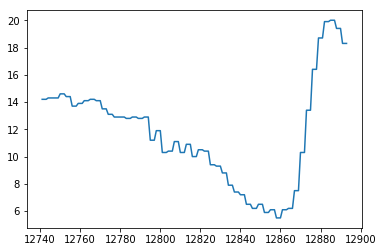

In [172]:
# Note: .plot() passes data to matplotlib. You can look up its parameters, eg. figsize.

latvia.unemployment_rate.plot()